<a href="https://colab.research.google.com/github/Rajeeb321123/Machine-learning-Journey/blob/master/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [6]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1: -1].values
y = dataset.iloc[:, -1].values

In [7]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [10]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [15]:
y=y.reshape((len(y),1)) # (rows, column) # reshaping dependent varaiable for feature scaling
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler # -3 t0 +3
sc_X = StandardScaler()
sc_Y = StandardScaler() # we need different standard scaler for y
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

In [18]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [19]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [21]:
len(y)

10

In [23]:
# reshape y to 1D array for SVR but this isnot needed. Just for warning
y = y.reshape(len(y))

In [24]:
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

## Training the SVR model on the whole dataset

learn different kernel of SVM and their mathmatics and formulas from  https://data-flair.training/blogs/svm-kernel-functions/

In [25]:
from sklearn.svm import SVR
# rbf means Gaussian radial basis function, most common SVM's kernel
regressor = SVR(kernel = 'rbf') # now we have to input some variable
regressor.fit(X, y)

SVR()

## Predicting a new result

In [26]:
# y is also scaled so output will be also scaled but we want real original values. So, we use inverse_transform.
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1)) # X is in 2D array [[]]

array([[170370.0204065]])

## Visualising the SVR results

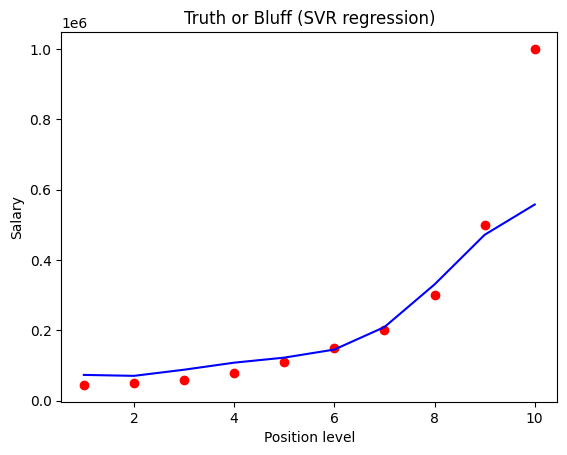

In [34]:
# we need to reshape y here because we reshape y to 1D array for warning in SVR but inverse _transform requires 2D array
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y.reshape(len(y),1)), color ='red') # we reverse X, y to their original scale
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue') # rememeber X is already scaled so , no need to tranfrom while fitting
plt.title('Truth or Bluff (SVR regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-37-a839c177d8af>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid =np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


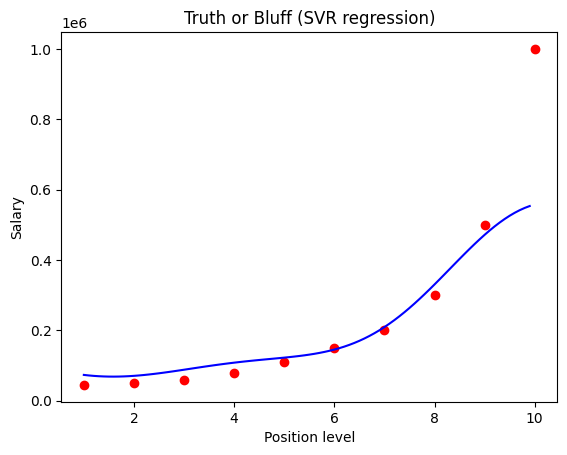

In [37]:
# we need to reshape y here because we reshape y to 1D array for warning in SVR but inverse _transform requires 2D array
X_grid =np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y.reshape(len(y),1)), color ='red') # we reverse X, y to their original scale
plt.plot(X_grid,sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue') # X_grid isnot scaled
plt.title('Truth or Bluff (SVR regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()